# Parcial 3 AI

## Preprocessing of the data

In [298]:
import pandas as pd


In [299]:
df_abalone = pd.read_csv('../Data/abalone.data')

In [300]:
df_abalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [301]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [302]:
df_abalone['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [303]:
#get dummies of df_abalone
df_abalone_tmp = pd.get_dummies(df_abalone['Sex'], drop_first=True)

In [304]:
df_abalone = pd.concat([df_abalone, df_abalone_tmp], axis=1)

In [305]:
df_abalone.drop("Sex", axis=1, inplace=True)

In [306]:
df_abalone.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


<Axes: >

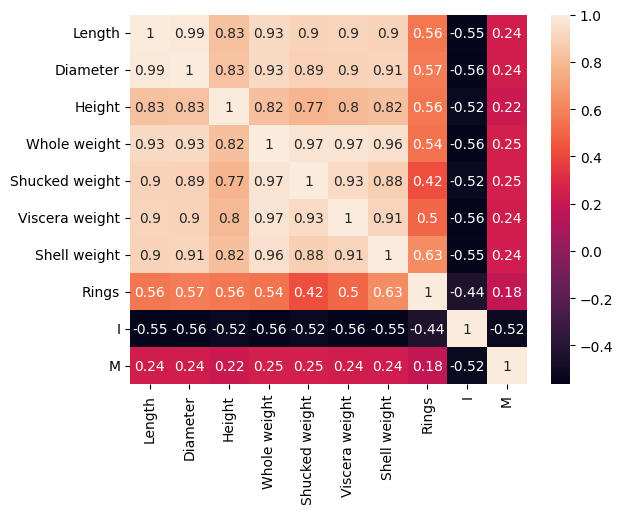

In [307]:
# do a correlation matrix and show it as a heatmap
import seaborn as sns

sns.heatmap(df_abalone.corr(), annot=True)



In [308]:
# drop the columns that are correlated with each other with a correlation higher than 0.85

# df_abalone.drop("Length", axis=1, inplace=True)
# df_abalone.drop("Diameter", axis=1, inplace=True)
# df_abalone.drop("Whole weight", axis=1, inplace=True)
# df_abalone.drop("Shucked weight", axis=1, inplace=True)
# df_abalone.drop("Viscera weight", axis=1, inplace=True)


In [309]:
df_abalone["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [310]:
df_abalone["Rings"].nunique()

28

In [311]:
# see how many unique values are in the column "Rings" for each value of ring
df_abalone["Rings"].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [312]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   I               4177 non-null   bool   
 9   M               4177 non-null   bool   
dtypes: bool(2), float64(7), int64(1)
memory usage: 269.3 KB


In [313]:
# # do a pca on the data to create just 4 columns plus the column "Rings"
# from sklearn.decomposition import PCA

# pca = PCA(n_components=4)

# pca.fit(df_abalone.drop("Rings", axis=1))

# pca.explained_variance_ratio_

# pca.explained_variance_ratio_.sum()

# df_abalone_pca = pca.transform(df_abalone.drop("Rings", axis=1))

# df_abalone_pca = pd.DataFrame(df_abalone_pca, columns=["PCA1", "PCA2", "PCA3", "PCA4"])

# df_abalone_pca["Rings"] = df_abalone["Rings"]

# df_abalone_pca.head(5)

## Model training

In [314]:
#import knn classification,random forest classification, redes neurais, svm, naive bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

model_dict = {}

model_dict['Knn'] = {'model': KNeighborsClassifier(), 'grid': {'model__n_neighbors': (1, 40)}}
model_dict['Random Forest'] = {'model': RandomForestClassifier(random_state=42), 'grid': {'model__max_depth': (1, 20),'model__n_estimators': [100, 200, 300]}, 'n_estimators': range(1, 20)}
model_dict['Neural Network'] = {'model': MLPClassifier(random_state=42), 'grid': {}}
model_dict['SVM'] = {'model': SVC(random_state=42), 'grid': {'model__C': [0.1, 1, 10, 100, 1000],'model__gamma': [1, 0.1, 0.01, 0.001, 0.0001]}}
model_dict['Naive Bayes'] = {'model': GaussianNB(), 'grid': {'model__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]}}

for model_name, model_info in model_dict.items():
    model_info['Precision'] = {}
    model_info['Recall'] = {}
    model_info['Accuracy'] = {}
    model_info['Y_pred'] = []




In [315]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV

X = df_abalone.drop("Rings", axis=1)
y = df_abalone["Rings"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [316]:
import warnings 
warnings.filterwarnings("ignore")

In [317]:
for model_name, model_info in model_dict.items():
    print("Training model: ", model_name)
    pipe = Pipeline([('scaler', MinMaxScaler()), ('model', model_info['model'])])
    grid = GridSearchCV(pipe, model_info['grid'], cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)
    print("Best parameters: ", grid.best_params_)
    y_pred = grid.predict(X_test)
    model_info['Y_pred'] = y_pred
    model_info['Precision'] = precision_score(y_test, y_pred, average='weighted')
    model_info['Recall'] = recall_score(y_test, y_pred, average='weighted')
    model_info['Accuracy'] = accuracy_score(y_test, y_pred)

Training model:  Knn
Best parameters:  {'model__n_neighbors': 40}
Training model:  Random Forest
Best parameters:  {'model__max_depth': 20, 'model__n_estimators': 100}
Training model:  Neural Network


/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/leonardovaia/miniconda3/envs/ml_venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters:  {}
Training model:  SVM
Best parameters:  {'model__C': 100, 'model__gamma': 1}
Training model:  Naive Bayes
Best parameters:  {'model__var_smoothing': 0.1}


In [318]:
for model_name, model_info in model_dict.items():
    print(model_name)
    print('Precision:', model_info['Precision'])
    print('Recall:', model_info['Recall'])
    print('Accuracy:', model_info['Accuracy'])
    

Knn
Precision: 0.22542459384991148
Recall: 0.24561403508771928
Accuracy: 0.24561403508771928
Random Forest
Precision: 0.23260462652776706
Recall: 0.24162679425837322
Accuracy: 0.24162679425837322
Neural Network
Precision: 0.23520049785781907
Recall: 0.266347687400319
Accuracy: 0.266347687400319
SVM
Precision: 0.2616681593365236
Recall: 0.266347687400319
Accuracy: 0.266347687400319
Naive Bayes
Precision: 0.21223768428814818
Recall: 0.25996810207336524
Accuracy: 0.25996810207336524


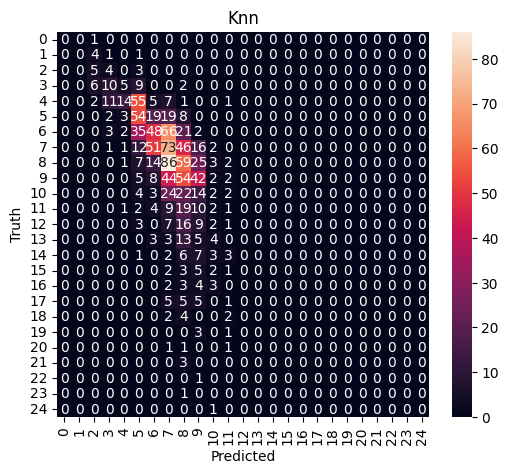

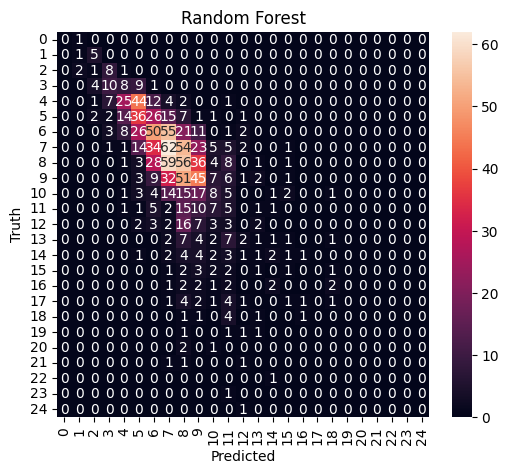

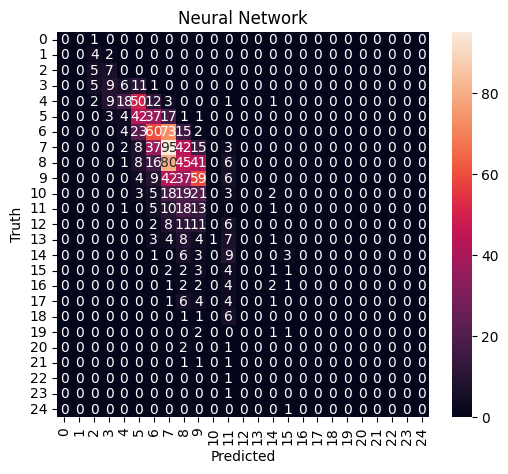

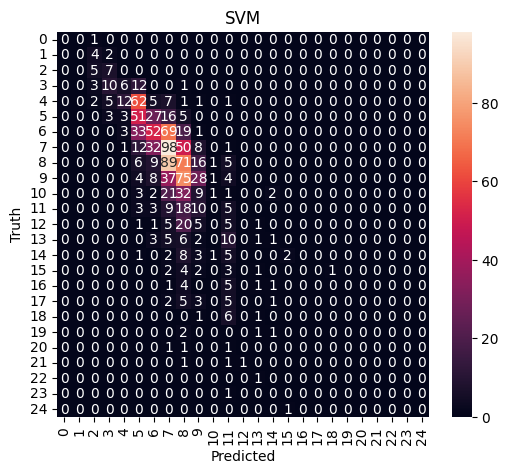

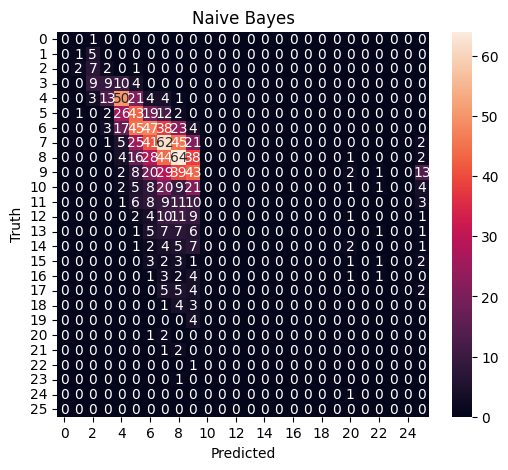

In [319]:
# do the confusion matrix for each model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for model_name, model_info in model_dict.items():
    y_pred = model_info['Y_pred']
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(model_name)
    plt.show()